<a href="https://colab.research.google.com/github/Fabriloko/Machine_Learn/blob/main/Lista4_Fabricio_414900_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV as GS
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import plot_roc_curve as ROC
from sklearn.metrics import plot_precision_recall_curve as PrecisionRecall

In [ ]:
boston_dataset = np.genfromtxt('/content/bostonbin.csv',delimiter=',')

# **Funcoes Uteis**

In [ ]:
def dividir_treino_teste(dados):
  np.random.shuffle(dados)
  X_treino = dados[:,:-1][:int(len(dados)*0.7)]
  X_teste  = dados[:,:-1][int(len(dados)*0.7):]
  y_treino = dados[:,[-1]][:int(len(dados)*0.7)]
  y_teste  = dados[:,[-1]][int(len(dados)*0.7):]
  return y_treino,y_teste,X_treino, X_teste

#Normalizacao 0 ou 1
class normalize_01():
  def __init__(self, X):
    self.min = np.min(X,axis=0)
    self.max = np.max(X,axis=0)
  def norma(self, X):
    return (X - self.min)/(self.max - self.min)
  def desnorm(self, X):
    return X * (self.max - self.min) + self.min  

#Avaliacao dos Classificadores
def metricas(real,pred):
  count = 0
  verd_posi  = 0 #Verdadeiro Positivos
  falso_neg  = 0 #Falsos Negativos
  falso_posi = 0 #Falsos Positivos
  for i in range(len(pred)):
    if pred[i] == real[i]:
      count += 1 
    if pred[i] == 1 and pred[i] == real[i]:
      verd_posi += 1 
    if pred[i] == 0 and pred[i] != real[i]:
      falso_neg += 1 
    if pred[i] == 1 and pred[i] != real[i]:
      falso_posi += 1 

  acc  = count    / len(pred)
  rev  = verd_posi / (verd_posi + falso_neg) 
  prec = verd_posi / (verd_posi + falso_posi)
  F_1 = 2 * (rev * prec)/(rev + prec)

  aux = np.round(np.array([acc, rev, prec, F_1]),3)
  return aux #{'Acuracia':acc,'Revocacao': rev, 'Precisao': prec, 'F1_Score': F_1}

# **1º Questão**

## **SVM Classifier**

In [ ]:
def SVMc(X, y):
  # Modelo base do SVM 
  Model = SVC(kernel= 'rbf', shrinking= False, probability= False, tol= 0.001
              , class_weight= None, verbose= False, max_iter= -1
              , decision_function_shape= 'ovr', break_ties= False)

  # Vetor com os parametros de "C"
  c1 = [ 2** -5 * 2 ** (n - 2) for n in range(2, 10, 2) ]
  c2 = [ 2 * 2 ** n for n in range(1, 16, 2) ]
  C = np.append(c1, c2)

  # Vetor com os paramteros de "gamma"
  g1 = [ 2** -15 * 2 ** (n - 2) for n in range(2, 20, 2) ]
  g2 = [ 2 * 2 ** n for n in range(1, 4, 2) ]
  gamma = np.append(g1, g2) 
  
  parametros = {'C': C, 'gamma':gamma}

  # Grid Search otimizado para o SVM
  Grid = GS(Model, parametros, scoring= None, n_jobs= -1,
            cv= 10, refit= True, verbose= False,
            error_score= np.nan, return_train_score= True)

  Grid.fit(X, y.ravel())

  return Grid


## **Random Forest**

In [ ]:
 def RF(X, y):
  # Modelo base do Random Forest 
  Model = RFC(criterion= 'gini', min_samples_split= 2, min_samples_leaf= 1
              , min_weight_fraction_leaf= 0.0, max_features= 'auto'
              , max_leaf_nodes= None, min_impurity_decrease= 0.0
              , min_impurity_split= None, bootstrap= False
              , n_jobs= -1, random_state= None, verbose= False, warm_start= False
              , class_weight= None, ccp_alpha= 0.0) 

  # Vetor com os numeros de estimadores base
  n_estimadores = [ n for n in range(10, 201, 10) ] 

  # Vetor com os paramteros maxima profundidade
  profundidade = [ 2, 4, 6, 8, 'None' ]
  
  parametros = {'n_estimators': n_estimadores, 'max_depth': profundidade}

  # Grid Search otimizado para o SVM
  Grid = GS(Model, parametros, scoring= None, n_jobs= -1,
            cv= 10, refit= True, verbose= False,
            error_score= np.nan, return_train_score= True)

  Grid.fit(X, y.ravel())

  return Grid

## **Treinando Modelos**

In [ ]:
y_treino,y_teste,X_treino, X_teste = dividir_treino_teste(boston_dataset)

norm_X = normalize_01(X_treino)
X_treino = norm_X.norma(X_treino)
X_teste = norm_X.norma(X_teste)

Model_SVMc = SVMc(X_treino, y_treino) # Modelo otimizado SVM
Model_RF = RF(X_treino, y_treino) # Modelo otimizado para o Random Forest

y_pred_SVM = Model_SVMc.predict(X_teste) # Valores preditos para o SVM
y_pred_RF = Model_RF.predict(X_teste)

metr_SVM = metricas(y_teste, y_pred_SVM) # Metricas para o SVM 
metr_RF  = metricas(y_teste, y_pred_RF)

## **Comparação de Metricas**

In [ ]:
aux2 = [[Model_SVMc.best_params_,metr_SVM[0], metr_SVM[1], metr_SVM[2], metr_SVM[3]]\
        ,[Model_RF.best_params_, metr_RF[0], metr_RF[1], metr_RF[2], metr_RF[3]]]
aux2 = np.array(aux2)

Metricas = pd.DataFrame(aux2.T, index= ['Melhores Parametros','Acuracia','Revocacao','Precisao','F1_Score'],
                        columns = ['SVM','RF'])
print(Metricas.to_markdown())

|                     | SVM                          | RF                                   |
|:--------------------|:-----------------------------|:-------------------------------------|
| Melhores Parametros | {'C': 256.0, 'gamma': 0.125} | {'max_depth': 8, 'n_estimators': 20} |
| Acuracia            | 0.855                        | 0.862                                |
| Revocacao           | 0.885                        | 0.908                                |
| Precisao            | 0.865                        | 0.859                                |
| F1_Score            | 0.875                        | 0.883                                |


## **Curvas Roc e Precision Recall**

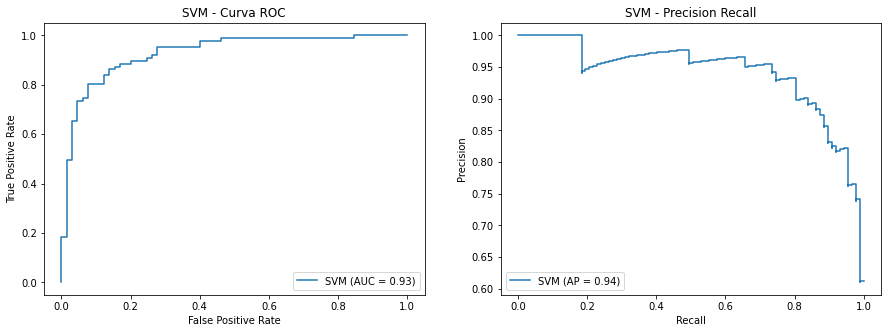

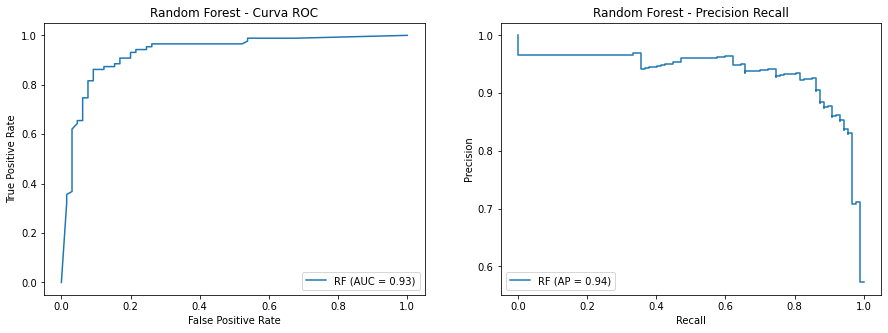

In [ ]:
fig1, (ROC_SVM, PrecRec_SVM) = plt.subplots(1, 2, figsize=(15, 5));

# Curva ROC e Precision-Recall para o SVM
ROC(Model_SVMc, X_teste, y_teste, name= 'SVM', ax= ROC_SVM, drop_intermediate= False);
PrecisionRecall(Model_SVMc, X_teste, y_teste, name= 'SVM', ax= PrecRec_SVM);

ROC_SVM.set_title('SVM - Curva ROC')
PrecRec_SVM.set_title('SVM - Precision Recall')

fig2, (ROC_RF, PrecRec_RF) = plt.subplots(1, 2, figsize=(15, 5));

# Curva ROC e Precision-Recall para o Random Forest
ROC(Model_RF, X_teste, y_teste, name= 'RF', ax= ROC_RF, drop_intermediate= False);
PrecisionRecall(Model_RF, X_teste, y_teste, name= 'RF', ax= PrecRec_RF);

ROC_RF.set_title('Random Forest - Curva ROC')
PrecRec_RF.set_title('Random Forest - Precision Recall')

plt.plot();